In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data_path = r'D:\projects\PNET Radiomics\data'
excel_file_names = ["JayaFeaturesTrainPrepared"]
excel_file_names_val = ["JayaFeaturesTestPrepared"]
outcome_column = "Grade"
exclude_columns = ["Patient_ID"]
exclude_columns_val = ["Case_ID"]
categorical_columns = []
CORR_THRESH = 0.8

In [3]:
features_file = os.path.join(data_path, "JayaFeaturesTrainPrepared.xlsx")

In [4]:
df = pd.read_excel(features_file)

# Exploratory data analysis

In [8]:
df.shape

(140, 1787)

In [9]:
df.head()

,Patient_ID,B,C,D,E,F,G,H,I,J,...,BPJ,BPK,BPL,BPM,BPN,BPO,BPP,BPQ,BPR,Grade
0,pnet_ID103,0.019971,4.674423,0.643856,7.133954,0.424301,15.396680,23.861394,4.180965,6.203608,...,1.934180,1.809359,1.795336,2.316759,1.707493,1.016517,1.047146,1.966275,1.757150,0
1,pnet_ID104,0.017621,9.063771,0.229503,5.908549,0.338557,13.581278,14.570426,3.913887,6.265841,...,7.235115,1.573164,1.745530,1.476111,3.366901,5.047500,2.914128,4.132618,7.958190,1
2,pnet_ID106,0.048893,2.377996,0.710708,4.267037,0.572845,21.266012,14.690150,3.700250,5.120612,...,5.159726,1.896011,1.868298,1.975207,3.499734,5.623181,3.972170,1.758370,2.160812,0
3,pnet_ID107,0.039014,2.278861,0.579593,2.720823,0.539726,11.083248,8.604429,3.566120,5.181799,...,3.855913,9.872760,6.901150,6.019608,3.142958,2.230124,2.028867,3.308086,6.282231,1
4,pnet_ID108,0.025233,3.377998,0.704413,5.730004,0.481675,20.440826,19.542018,4.052760,5.812858,...,1.916132,1.999057,2.177197,1.416979,1.876469,1.932155,1.933796,2.040655,1.560621,0


* We can see the train data has 140 patients and 1785 radiomics featuers. These features are unknown:

In [10]:
columns = df.columns
columns

Index(['Patient_ID', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       ...
       'BPJ', 'BPK', 'BPL', 'BPM', 'BPN', 'BPO', 'BPP', 'BPQ', 'BPR', 'Grade'],
      dtype='object', length=1787)

* First we want to fill the NaN values with 0:

In [11]:
df.fillna(0)

,Patient_ID,B,C,D,E,F,G,H,I,J,...,BPJ,BPK,BPL,BPM,BPN,BPO,BPP,BPQ,BPR,Grade
0,pnet_ID103,0.019971,4.674423,0.643856,7.133954,0.424301,15.396680,23.861394,4.180965,6.203608,...,1.934180,1.809359,1.795336,2.316759,1.707493,1.016517,1.047146,1.966275,1.757150,0
1,pnet_ID104,0.017621,9.063771,0.229503,5.908549,0.338557,13.581278,14.570426,3.913887,6.265841,...,7.235115,1.573164,1.745530,1.476111,3.366901,5.047500,2.914128,4.132618,7.958190,1
2,pnet_ID106,0.048893,2.377996,0.710708,4.267037,0.572845,21.266012,14.690150,3.700250,5.120612,...,5.159726,1.896011,1.868298,1.975207,3.499734,5.623181,3.972170,1.758370,2.160812,0
3,pnet_ID107,0.039014,2.278861,0.579593,2.720823,0.539726,11.083248,8.604429,3.566120,5.181799,...,3.855913,9.872760,6.901150,6.019608,3.142958,2.230124,2.028867,3.308086,6.282231,1
4,pnet_ID108,0.025233,3.377998,0.704413,5.730004,0.481675,20.440826,19.542018,4.052760,5.812858,...,1.916132,1.999057,2.177197,1.416979,1.876469,1.932155,1.933796,2.040655,1.560621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,pnet_ID94,0.011312,10.154192,0.460294,9.462194,0.324339,13.273385,27.694586,4.376835,6.806130,...,3.336232,1.708876,1.711819,2.568972,1.875091,1.498082,1.782682,1.628485,2.143129,1
136,pnet_ID95,0.027169,4.454461,0.498365,4.629439,0.438469,14.284527,14.063296,3.821017,5.722297,...,3.100877,2.097582,1.420867,1.789910,3.312037,4.477746,5.952855,3.599703,6.892502,1
137,pnet_ID96,0.025713,12.761301,0.225203,8.292054,0.290722,16.615817,20.406913,3.888146,5.850117,...,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,0
138,pnet_ID99,0.020222,5.990789,0.493759,6.347351,0.381062,16.898608,19.398614,4.006186,6.040777,...,1.007888,1.457791,1.248904,1.744677,1.033643,2.180318,2.263024,2.103818,2.256588,0


* We define a function to remove correlated features:

In [13]:
def remove_collinear_features(df, threshold):
    """
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold.
    :param x: features dataframe
    :param threshold: features with correlations greater than this value are removed
    :return: dataframe that contains only the non-highly-collinear features
    """
    case = df.iloc[:, 0]
    x = df.iloc[:, 1:-1]
    y = df.iloc[:, -1]

    corr_matrix = x.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    x_dropped = x.drop(columns = columns_to_drop)

    out_df = pd.concat([case, x_dropped, y], axis = 1)

    print(f"Features with correlation above {threshold} were removed.")
    print(f"Among the {x.shape[1]} features, {x_dropped.shape[1]} features were remained.")

    return out_df

In [15]:
df = remove_collinear_features(df, CORR_THRESH)

Features with correlation above 0.8 were removed.
Among the 1785 features, 570 features were remained.


In [16]:
df.head()

,Patient_ID,B,C,D,G,W,AA,AE,AI,AK,...,BNN,BNQ,BNT,BOA,BOB,BOH,BOI,BOK,BOL,Grade
0,pnet_ID103,0.019971,4.674423,0.643856,15.396680,93.362784,3.307145,75.738123,3.120669,0.356526,...,1.571486,1.370783,1.026443,2.248505,2.216735,2.003958,2.051362,2.055706,1.523224,0
1,pnet_ID104,0.017621,9.063771,0.229503,13.581278,102.651477,2.463915,45.590989,2.865100,0.402618,...,1.820570,1.901124,2.111715,2.557598,6.383745,4.012885,7.178648,4.333843,2.928425,1
2,pnet_ID106,0.048893,2.377996,0.710708,21.266012,59.002859,8.665816,318.522525,6.593112,0.292031,...,3.545005,2.283385,1.701034,2.162177,3.495113,4.090196,2.432130,3.192110,2.076877,0
3,pnet_ID107,0.039014,2.278861,0.579593,11.083248,447.476406,7.119043,95.962408,3.389152,0.178293,...,2.048272,2.290532,3.062606,2.418578,3.257811,2.732809,2.175756,2.592022,2.197379,1
4,pnet_ID108,0.025233,3.377998,0.704413,20.440826,66.843840,5.303445,182.871020,3.499430,0.331798,...,1.930479,1.308681,1.798431,1.120498,2.187048,2.008081,2.146750,1.968452,2.206032,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 572 entries, Patient_ID to Grade
dtypes: float64(569), int64(2), object(1)
memory usage: 625.8+ KB


In [18]:
df.isnull().sum()

Patient_ID    0
B             0
C             0
D             0
G             0
             ..
BOH           0
BOI           0
BOK           0
BOL           0
Grade         0
Length: 572, dtype: int64

In [19]:
df.describe()

,B,C,D,G,W,AA,AE,AI,AK,AL,...,BNN,BNQ,BNT,BOA,BOB,BOH,BOI,BOK,BOL,Grade
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.040315,5.009451,0.519378,13.374970,149.877352,6.889989,105.021047,3.711000,0.353328,0.011305,...,2.051411,2.008685,1.955519,2.567958,3.013893,2.571453,3.032903,2.879107,2.668862,0.371429
std,0.046700,3.306051,0.152174,4.572256,201.956170,9.007151,89.828916,1.685723,0.104987,0.004520,...,0.730990,0.637729,0.572502,1.450916,2.164816,1.493378,2.439703,2.238620,2.241558,0.484922
min,0.009898,0.460868,0.077162,1.709613,8.165214,1.606417,17.476580,2.136448,0.130424,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.017234,2.394408,0.431410,10.131658,57.020217,2.816513,52.464133,2.832535,0.266313,0.008754,...,1.500000,1.610967,1.538570,1.679479,1.704616,1.714721,1.786924,1.664557,1.684290,0.000000
50%,0.025177,4.526736,0.516316,13.970840,90.501315,4.064234,78.345504,3.277930,0.354611,0.011109,...,1.911991,1.895822,1.860835,2.233298,2.429850,2.212943,2.276681,2.292984,2.082794,0.000000
75%,0.042453,7.054295,0.632401,16.647955,157.296666,6.966036,122.655212,3.854398,0.422710,0.013979,...,2.369029,2.246395,2.214684,2.864615,3.385596,2.854946,3.058492,3.154074,2.726561,1.000000
max,0.381233,18.101766,0.865217,22.561948,1622.142208,71.032250,688.989125,13.742820,0.667206,0.031354,...,5.112564,4.722399,4.633050,10.437106,14.601350,14.513803,16.693735,17.918004,19.373448,1.000000


## Finding outliers

In [20]:
print(round(df.describe()),2)

           B      C      D      G       W     AA     AE     AI     AK     AL  \
count  140.0  140.0  140.0  140.0   140.0  140.0  140.0  140.0  140.0  140.0   
mean     0.0    5.0    1.0   13.0   150.0    7.0  105.0    4.0    0.0    0.0   
std      0.0    3.0    0.0    5.0   202.0    9.0   90.0    2.0    0.0    0.0   
min      0.0    0.0    0.0    2.0     8.0    2.0   17.0    2.0    0.0    0.0   
25%      0.0    2.0    0.0   10.0    57.0    3.0   52.0    3.0    0.0    0.0   
50%      0.0    5.0    1.0   14.0    91.0    4.0   78.0    3.0    0.0    0.0   
75%      0.0    7.0    1.0   17.0   157.0    7.0  123.0    4.0    0.0    0.0   
max      0.0   18.0    1.0   23.0  1622.0   71.0  689.0   14.0    1.0    0.0   

       ...    BNN    BNQ    BNT    BOA    BOB    BOH    BOI    BOK    BOL  \
count  ...  140.0  140.0  140.0  140.0  140.0  140.0  140.0  140.0  140.0   
mean   ...    2.0    2.0    2.0    3.0    3.0    3.0    3.0    3.0    3.0   
std    ...    1.0    1.0    1.0    1.0    2.0   

* Let's see if the "W" variable contains outliers:

Text(0, 0.5, 'W')

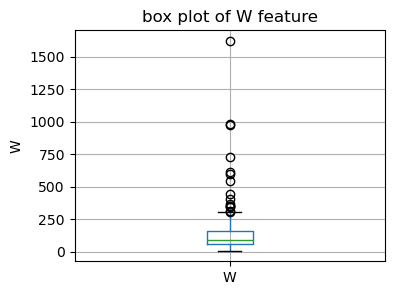

In [23]:
plt.figure(figsize=(4,3))
fig = df.boxplot(column='W')
fig.set_title("box plot of W feature")
fig.set_ylabel("W")

* plot histogram to check distribution

Text(0, 0.5, 'Grade')

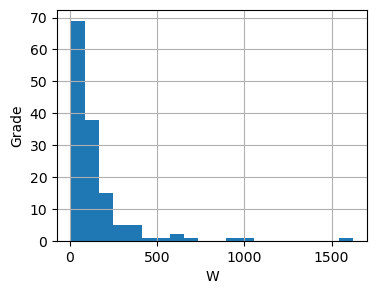

In [28]:
plt.figure(figsize=(4,3))
fig = df.W.hist(bins=20)
fig.set_xlabel('W')
fig.set_ylabel('Grade')

* find outliers for W variable using interquantile:

In [29]:
IQR = df.W.quantile(0.75) - df.W.quantile(0.25)
lower_fence = df.W.quantile(0.25) - (IQR * 3)
upper_fence = df.W.quantile(0.75) + (IQR * 3)
print("W outliers are values < {lower_boundary} or > {upper_boundary}".format(lower_boundary=lower_fence, upper_boundary=upper_fence))

W outliers are values < -243.80913185000003 or > 458.12601500000005


So the outliers for 'W' are values > 458.12601500000005

## Declare feature vector and target variable

In [30]:
X = df.loc[:, ~df.columns.isin(exclude_columns + [outcome_column])]
y = df[outcome_column]

## Split data into separate training and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
X_train.shape, X_test.shape

((98, 570), (42, 570))

## Feature Engineering